In [1]:
import torch 

In [2]:
from torch import nn

In [3]:
import numpy as np

In [4]:
train_data = np.genfromtxt("train_playground.csv",
                           delimiter=",")

In [5]:
train = torch.from_numpy(train_data[:,]).type(torch.float)

In [6]:
train.shape

torch.Size([14839, 38])

In [7]:
device = "cpu"

In [8]:
X, y = train[1:,1:32].to(device), train[1:,32:].to(device)

In [9]:
X.size(), y.size()

(torch.Size([14838, 31]), torch.Size([14838, 6]))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [11]:
class NNmodel(nn.Module):
    def __init__(self, infeat, outfeat, hiddenfeat):
        super().__init__()
        
        self.layer_stack= nn.Sequential(
            nn.Linear(in_features=infeat, out_features=hiddenfeat), 
            nn.ReLU(),
            nn.Linear(in_features=hiddenfeat, out_features=hiddenfeat),
            nn.ReLU(),
            nn.Linear(in_features=hiddenfeat, out_features=outfeat)
        ) 
        
    def forward(self, x):
        return self.layer_stack(x)

def AccuracyFn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    return(correct*100/len(y_pred))

modelNN1 = NNmodel(infeat=31,outfeat=1,hiddenfeat=16).to(device)

lossFn = nn.BCEWithLogitsLoss()

optimizer1 = torch.optim.ASGD(params = modelNN1.parameters(),
                            lr = 0.1)


In [12]:
X_test

tensor([[1.7791e+03, 2.2047e+01, 1.4965e+01,  ..., 1.0499e+02, 0.0000e+00,
         0.0000e+00],
        [2.0187e+02, 4.4319e+00, 2.8543e+00,  ..., 3.7167e+01, 0.0000e+00,
         0.0000e+00],
        [2.3517e+02, 8.3081e+00, 3.4823e+00,  ..., 3.2771e+01, 0.0000e+00,
         0.0000e+00],
        ...,
        [2.0728e+03, 2.4911e+01, 1.5675e+01,  ..., 1.1259e+02, 0.0000e+00,
         0.0000e+00],
        [1.4622e+02, 5.8657e+00, 3.1768e+00,  ..., 4.3000e+01, 2.0000e+00,
         2.0000e+00],
        [1.8631e+03, 2.5822e+01, 1.4113e+01,  ..., 1.1565e+02, 1.0000e+00,
         1.0000e+00]])

In [13]:
epochs = 1000

for epoch in range(epochs):
    # 1. Forward pass
    y_logits1 = modelNN1(X_train).squeeze()
    y_pred1 = torch.round(torch.sigmoid(y_logits1)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = lossFn(y_logits1, y_train[:,0]) # BCEWithLogitsLoss calculates loss using logits
    acc = AccuracyFn(y_true=y_train[:,0], 
                      y_pred=y_pred1)
    
    # 3. Optimizer zero grad
    optimizer1.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer1.step()

    ### Testing
    modelNN1.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits1 = modelNN1(X_test).squeeze()
      test_pred1 = torch.round(torch.sigmoid(test_logits1)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss1 = lossFn(test_logits1, y_test[:,0])
      test_acc1 = AccuracyFn(y_true=y_test[:,0],
                             y_pred=test_pred1)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss1:.5f}, Test Accuracy: {test_acc1:.2f}%")

Epoch: 0 | Loss: 4.36720, Accuracy: 33.13% | Test Loss: 2433.96167, Test Accuracy: 66.07%
Epoch: 100 | Loss: 0.63786, Accuracy: 66.55% | Test Loss: 24.88688, Test Accuracy: 66.04%
Epoch: 200 | Loss: 0.63450, Accuracy: 66.93% | Test Loss: 24.80235, Test Accuracy: 66.04%
Epoch: 300 | Loss: 0.64126, Accuracy: 66.95% | Test Loss: 24.72668, Test Accuracy: 66.04%
Epoch: 400 | Loss: 0.63534, Accuracy: 66.94% | Test Loss: 24.65088, Test Accuracy: 66.00%
Epoch: 500 | Loss: 0.63777, Accuracy: 66.94% | Test Loss: 24.57513, Test Accuracy: 66.04%
Epoch: 600 | Loss: 0.63474, Accuracy: 66.95% | Test Loss: 24.50149, Test Accuracy: 66.04%
Epoch: 700 | Loss: 0.63402, Accuracy: 66.95% | Test Loss: 24.42635, Test Accuracy: 66.04%
Epoch: 800 | Loss: 0.63404, Accuracy: 66.94% | Test Loss: 24.35320, Test Accuracy: 66.04%
Epoch: 900 | Loss: 0.63403, Accuracy: 66.95% | Test Loss: 24.27961, Test Accuracy: 66.04%


In [14]:
modelNN2 = NNmodel(infeat=31,outfeat=1,hiddenfeat=16).to(device)

lossFn = nn.BCEWithLogitsLoss()

optimizer2 = torch.optim.ASGD(params = modelNN2.parameters(),
                            lr = 0.1)

In [15]:
epochs = 1000

for epoch in range(epochs):
    # 1. Forward pass
    y_logits2 = modelNN2(X_train).squeeze()
    y_pred2 = torch.round(torch.sigmoid(y_logits2)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = lossFn(y_logits2, y_train[:,1]) # BCEWithLogitsLoss calculates loss using logits
    acc = AccuracyFn(y_true=y_train[:,1], 
                      y_pred=y_pred2)
    
    # 3. Optimizer zero grad
    optimizer2.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer2.step()

    ### Testing
    modelNN2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits2 = modelNN2(X_test).squeeze()
      test_pred2 = torch.round(torch.sigmoid(test_logits2)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = lossFn(test_logits2, y_test[:,1])
      test_acc = AccuracyFn(y_true=y_test[:,1],
                             y_pred=test_pred2)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 2.48266, Accuracy: 79.81% | Test Loss: 137.90527, Test Accuracy: 19.74%
Epoch: 100 | Loss: 0.50330, Accuracy: 79.79% | Test Loss: 44.81654, Test Accuracy: 80.15%
Epoch: 200 | Loss: 0.50285, Accuracy: 79.80% | Test Loss: 44.68307, Test Accuracy: 80.19%
Epoch: 300 | Loss: 0.50274, Accuracy: 79.79% | Test Loss: 44.55096, Test Accuracy: 80.22%
Epoch: 400 | Loss: 0.50265, Accuracy: 79.80% | Test Loss: 44.41952, Test Accuracy: 80.22%
Epoch: 500 | Loss: 0.50255, Accuracy: 79.81% | Test Loss: 44.28869, Test Accuracy: 80.22%
Epoch: 600 | Loss: 0.50241, Accuracy: 79.81% | Test Loss: 44.15812, Test Accuracy: 80.22%
Epoch: 700 | Loss: 0.50226, Accuracy: 79.81% | Test Loss: 44.02806, Test Accuracy: 80.22%
Epoch: 800 | Loss: 0.50222, Accuracy: 79.81% | Test Loss: 43.89835, Test Accuracy: 80.22%
Epoch: 900 | Loss: 0.50219, Accuracy: 79.81% | Test Loss: 43.76886, Test Accuracy: 80.22%


In [16]:
import seaborn as sn

<Axes: >

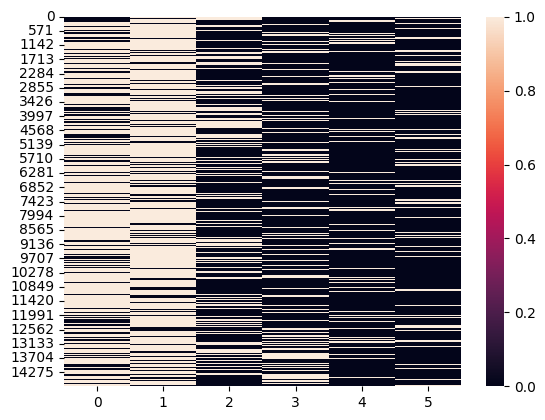

In [17]:
sn.heatmap(y.to("cpu"))

In [19]:
y_prob = torch.sigmoid(y_logits1)

In [20]:
y_prob

tensor([0.6681, 0.6681, 0.6681,  ..., 0.6681, 0.6681, 0.6681],
       grad_fn=<SigmoidBackward0>)

In [21]:
import matplotlib.pyplot as plt

(array([4.0000e+00, 4.0000e+00, 2.0000e+00, 1.1754e+04, 2.3000e+01,
        2.0000e+00, 6.0000e+00, 6.0000e+00, 8.0000e+00, 6.1000e+01]),
 array([0.45502934, 0.50930154, 0.56357378, 0.61784595, 0.67211819,
        0.72639036, 0.7806626 , 0.83493477, 0.88920701, 0.94347918,
        0.99775141]),
 <BarContainer object of 10 artists>)

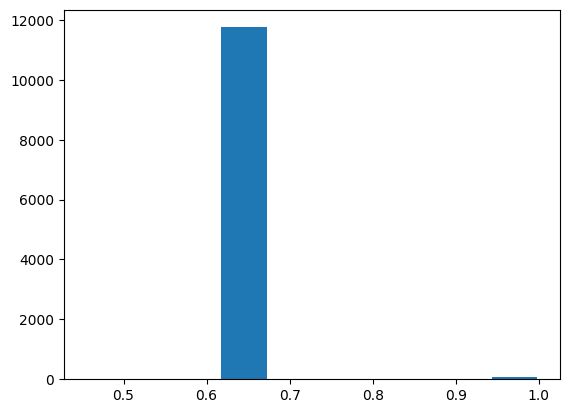

In [23]:
plt.hist(y_prob.detach().numpy())